### 목차
- Cookie & Session
- Django Authentication System
- Custom User Model
- Login/Logout
- Template with Authentication data
- 참고

# Cookie & Session

### HTTP
- HTML 문서와 같은 리소스들을 가져올 수 있도록 해주는 규약
- 웹(WWW)에서 이루어지는 모든 데이터 교환의 기초
- 특징
  - 비연결지향 : 서버는 요청에 대한 응답을 보낸 후 연결을 끊음
  - 무상태 : 연결을 끊는 순간 클라이언트와 서버 간의 통신이 끝나며 상태 정보가 유지되지 않음
  - 상태가 없으면 로그인 상태 유지, 장바구니에 담은 상태 유지가 어려움

# 쿠키(Cookie)
- 서버가 사용자의 웹 브라우저에 전송하는 작은 데이터 조각
- 서버가 제공하여 클라이언트 측에서 저장되는 작은 데이터 파일
- 사용자 인증, 추적, 상태 유지 등에 사용되는 데이터 저장 방식

### 쿠키 동작 예시
1. 브라우저가 웹 서버에 웹 페이지를 요청
2. 웹 서버는 요청된 페이지와 함께 쿠키를 포함한 응답을 브라우저에게 전송
3. 브라우저는 받은 쿠키를 저장소에 저장, 쿠키의 속성(만료 시간, 도메인, 주소 등)도 함께 저장됨
4. 이후 브라우저가 같은 웹 서버에 웹 페이지를 요청할 때, 저장된 쿠키 중 해당 요청에 적용 가능한 쿠키를 포함하여 함께 전송
5. 웹 서버는 받은 쿠키 정보를 확인하고, 필요에 따라 사용자 식별, 세션 관리 등을 수행
6. 웹 서버는 요청에 대한 응답을 보내며, 필요한 경우 새로운 쿠키를 설정하거나 기존 쿠키를 수정할 수 있음

### 쿠키 확인
- 개발자 도구 - Network탭 - cartView.pang 확인
- 서버는 응답과 함께 Set-Cookie 응답 헤더를 브라우저에게 전송
- 이 헤더는 클라이언트에게 쿠키를 저장하라고 전달하는 것
- 개발자도구 - Application탭 - Cookies
- 마우스 우측 버튼 - Clear - 새로고침 - 장바구니가 빈 것을 확인

### 쿠키의 작동 원리와 활용(1/2)
1. 쿠키 저장 방식
- 브라우저(클라이언트)는 쿠키를 KEY-VALUE의 데이터 형식으로 저장
- 쿠키에는 이름, 값 외에도 만료 시간, 도메인, 경로 등의 추가 속성이 포함 됨
2. 쿠키 전송 과정
- 서버는 HTTP 응답 헤더의 Set-Cookie 필드를 통해 클라이언트에게 쿠키를 전송
- 브라우저는 받은 쿠키를 저장해 두었다가, 동일한 서버에 재요청 시 HTTP 요청
- Header의 Cookie 필드에 저장된 쿠키를 함께 전송
3. 쿠키의 주요 용도
- 두 요청이 동일한 브라우저에서 들어왔는지 아닌지를 판단할 때 주로 사용됨
- 이를 이용해 사용자의 로그인 상태를 유지할 수 있음
- 상태가 없는(stateless) HTTP 프로토콜에서 상태 정보를 기억시켜 주는 역할
- 즉, 서버에게 "나 로그인 된 사용자야!"라는 인증 정보가 담긴 쿠키를 매 요청마다 계속 보내는 것


### 쿠키 사용 목적
1. 세션 관리(Session management)
- 로그인, 아이디 자동완성, 공지 하루 안 보기, 팝업 체크, 장바구니 등의 정보 관리
2. 개인화(Personalization)
- 사용자 선호 설정(언어 설정, 테마 등) 저장
3. 트래킹(Tracking)
- 사용자 행동을 기록 및 분석


# 세션(Session)
- 서버 측에서 생성되어 클라이언트와 서버 간의 상태를 유지
- 상태 정보를 저장하는 데이터 저장 방식
- 쿠키에 세션 데이터를 저장하여 매 요청시마다 세션 데이터를 함께 보냄

## 세션 작동 원리
1. 클라이언트가 로그인 요청 후 인증에 성공하면 서버가 session 데이터를 생성 후 저장
2. 생성된 session 데이터에 인증할 수 있는 session id를 발급
3. 발급한 session id를 클라이언트에게 응답(데이터는 서버에 저장, 열쇠만 주는 것)
4. 클라이언트는 응답 받은 session id를 쿠키에 저장
5. 클라이언트가 다시 동일한 서버에 접속하면 요청과 함께 쿠키(session id가 저장된 것)를 서버에 전달
6. 쿠키는 요청 때마다 서버에 함께 전송되므로 서버에서 session id를 확인해 로그인 되어 있다는 것을 계속해서 확인하도록 함

### 서버 측에서는 세션 데이터를 생성 후 저장하고 이 데이터에 접근할 수 있는 세션 ID를 생성
### 이 ID를 클라이언트 측으로 전달하고, 클라이언트는 쿠키에 이 ID를 저장
### 이후 클라이언트가 같은 서버에 재요청시마다 저장해 두었던 쿠키도 요청과 함께 전송
- 예를 들어 로그인 상태 유지를 위해 로그인 되어있다는 사실을 입증하는 데이터를 매 요청마다 계속해서 보내는 것

## 쿠키와 세션의 목적
- 클라이언트와 서버 간의 상태 정보를 유지하고 사용자를 식별하기 위해 사용

# Django Authentication System
- 사용자 인증과 관련된 기능을 모아 놓은 시스템
- 사용자가 자신이 누구인지 확인하는 것(신원 확인)

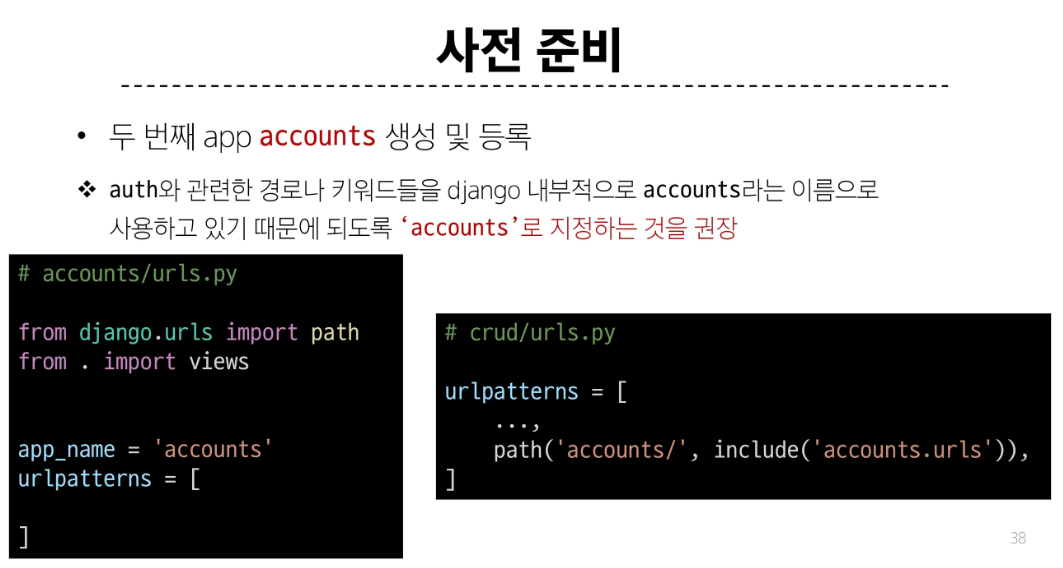


# Custom User model
## User model 대체하기
### 기존 User Model의 한계
- 지금까지 별도의 User 클래스 정의 없이 내장된 auth 앱에 작성된 User클래스를 사용했음
- Django의 기본 User 모델은 username, password 등 제공되는 필드가 매우 제한적
- 추가적인 사용자 정보(예: 생년월일, 주소, 나이 등)가 필요하다면 이를 위해 기본 User Model을 변경하기 어려움
- 별도의 설정 없이 사용할 수 있어 간편하지만, 개발자가 직접 수정하기 어려움

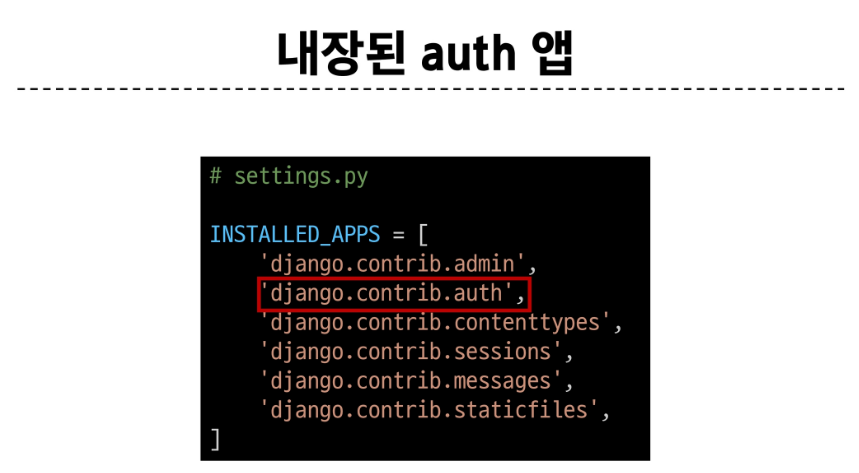

### User Model 대체의 필요성
- 프로젝트의 특정 요구사항에 맞춰 사용자 모델을 확장할 수 있음
- 예를 들어 이메일을 username으로 사용하거나 다른 추가 필드를 포함시킬 수 있음


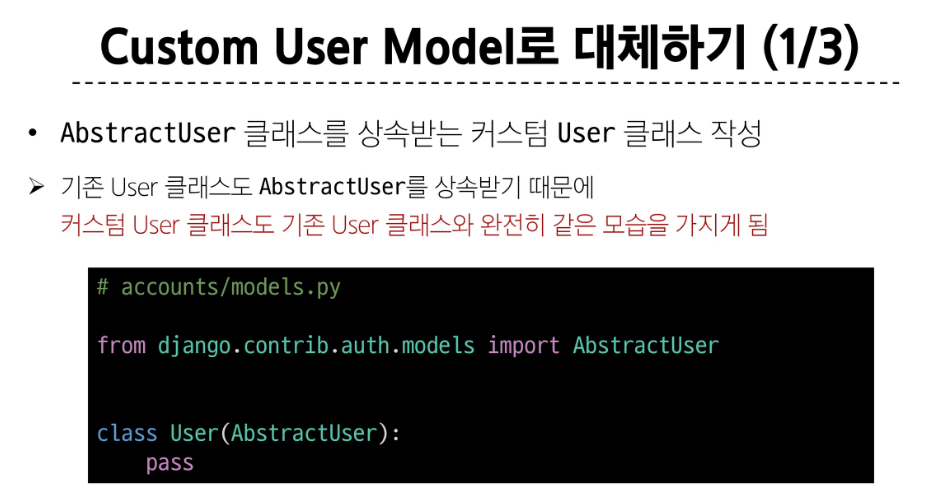
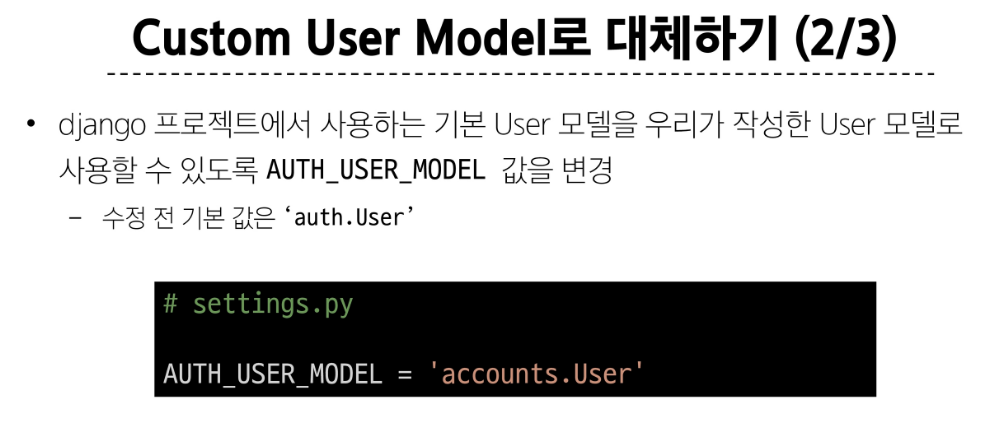
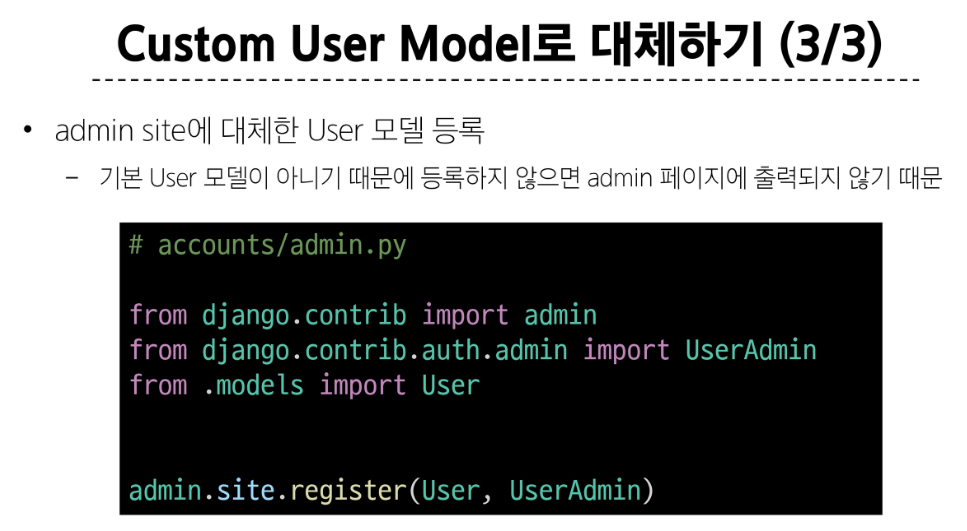

# AUTH_USER_MODEL
- Django 프로젝트의 User를 나타내는 데 사용하는 모델을 지정하는 속성
- **주의 : 프로젝트 중간에 AUTH_USER_MODEL을 변경할 수 없음**
- 이미 프로젝트가 진행되고 있을 경우 데이터베이스 초기화 후 진행
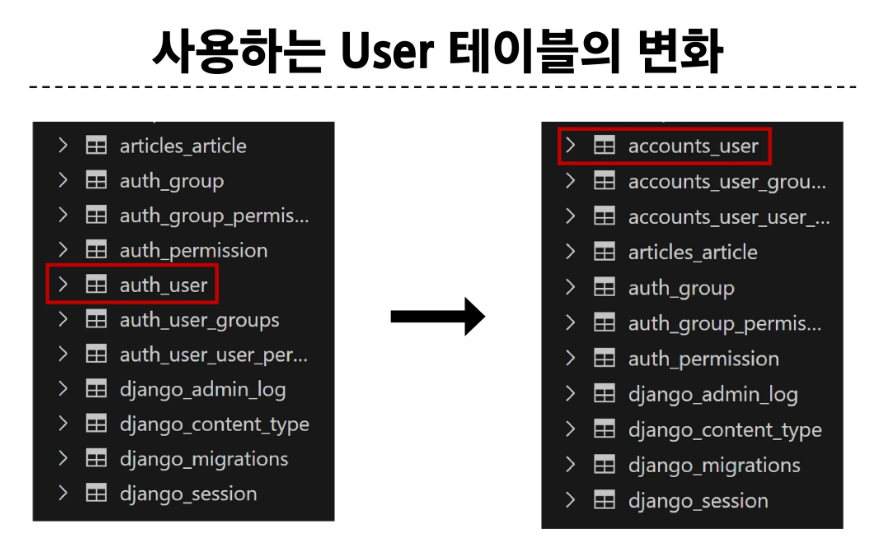

## 프로젝트를 시작하며 반드시 User 모델을 대체해야 한다
- Django는 새 프로젝트를 시작하는 경우 비록 기본 User 모델이 충분하더라도 커스텀 User 모델을 설정하는 것을 강력하게 권장하고 있음
- 커스텀 User 모델은 기본 User 모델과 동일하게 작동 하면서도 필요한 경우 나중에 맞춤 설정 할 수 있기 때문
- 단, User 모델 대체 작업은 프로젝트의 모든 migrations 혹은 첫 migrate를 실행하기 전에 이 작업을 마쳐야 함


# Login
- login은 Session을 Create하는 과정
## AuthenticationForm()
- 로그인 인증에 사용할 데이터를 입력 받는 built-in form
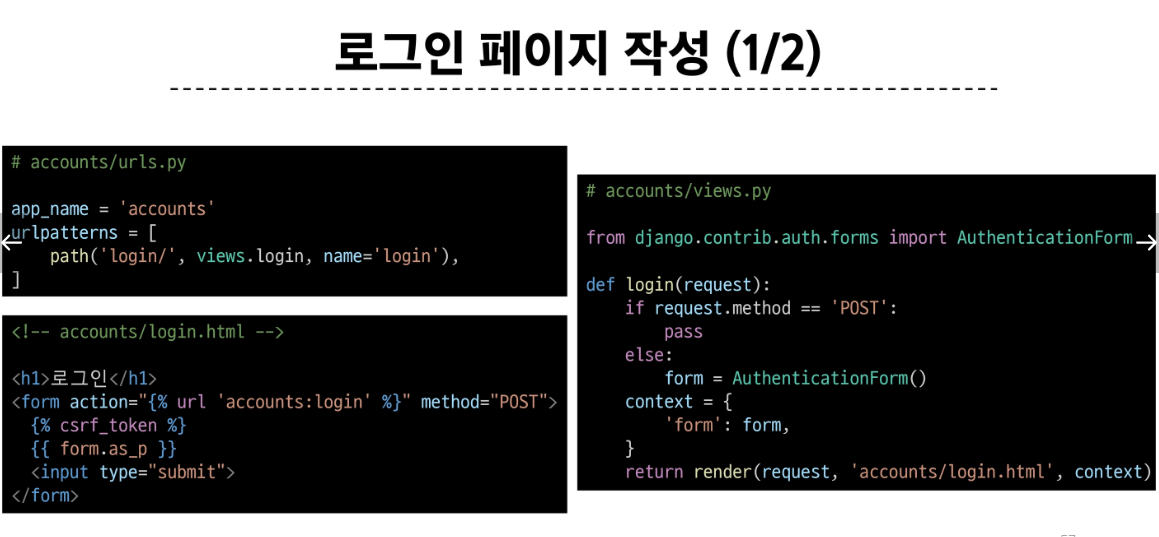
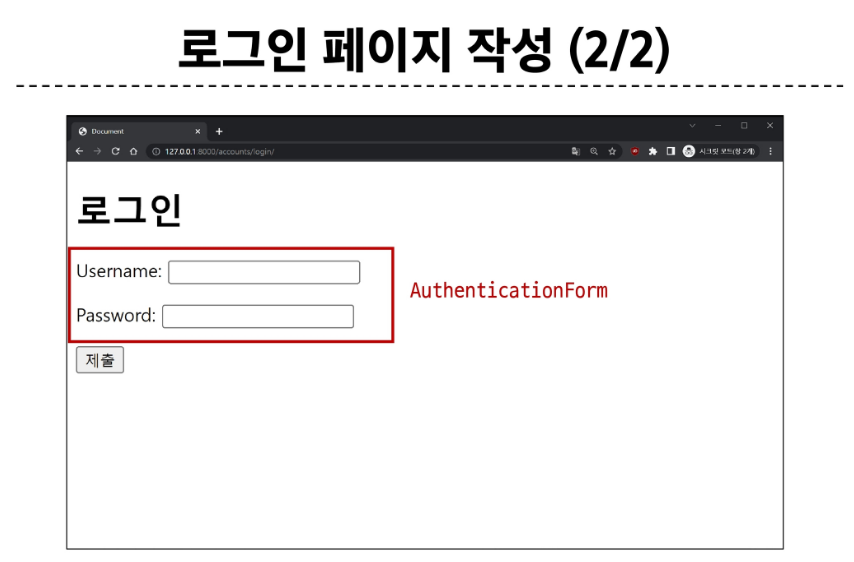
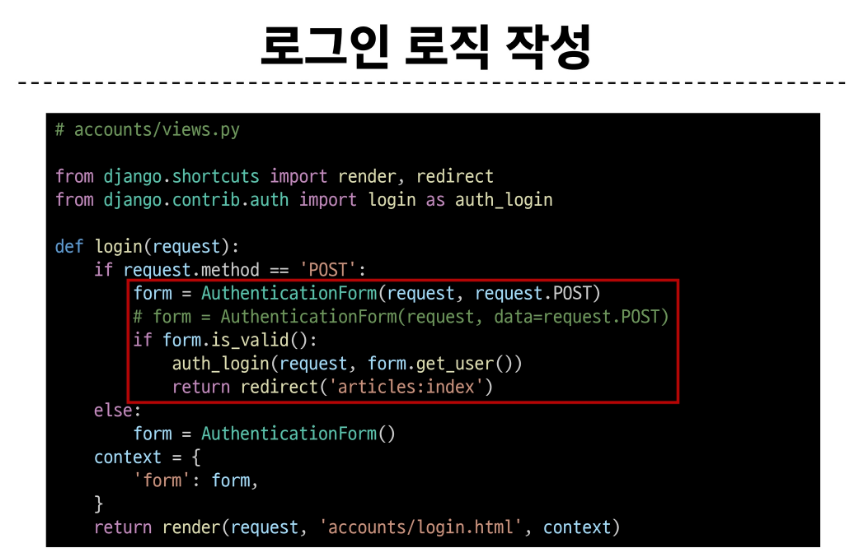
## login(request,user)
- AuthenticationForm을 통해 인증된 사용자를 로그인하는 함수
## get_user()
- AuthenticationForm의 인스턴스 메서드
- 유효성 검사를 통과했을 경우 로그인 한 사용자 객체를 반환

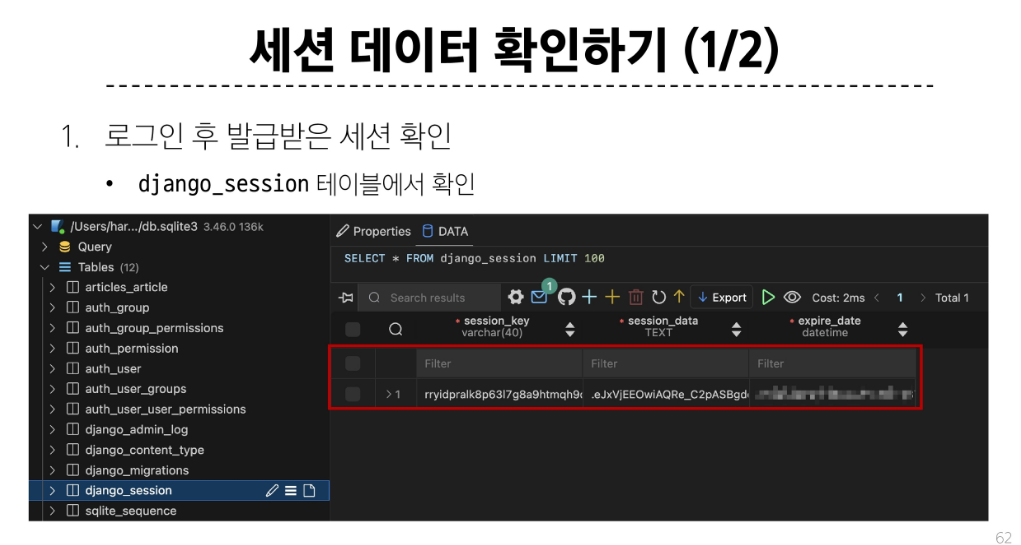
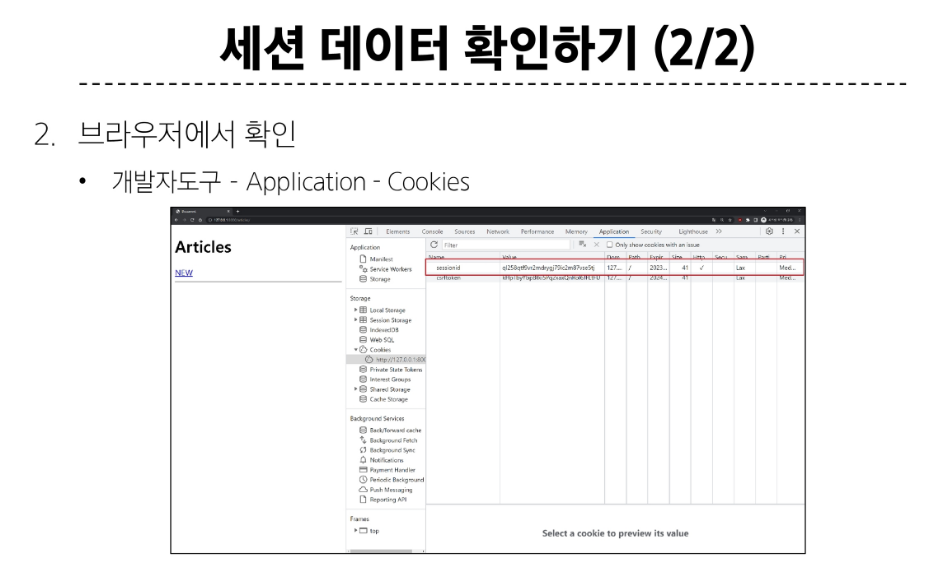
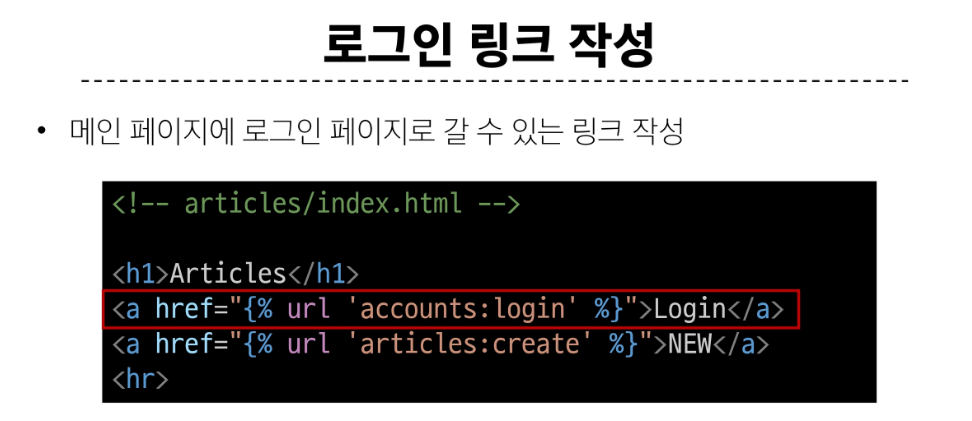

# Logout
- logout은 Session을 Delete하는 과정

## logout(requset)
1. DB에서 현재 요청에 대한 Session Data를 삭제
2. 클라이언트의 쿠키에서도 Session Id를 삭제


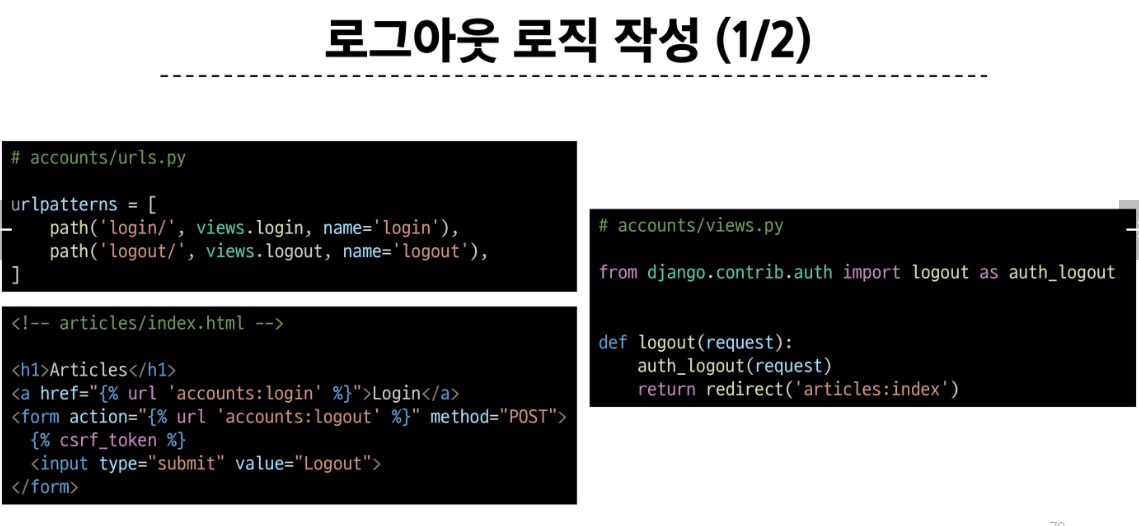
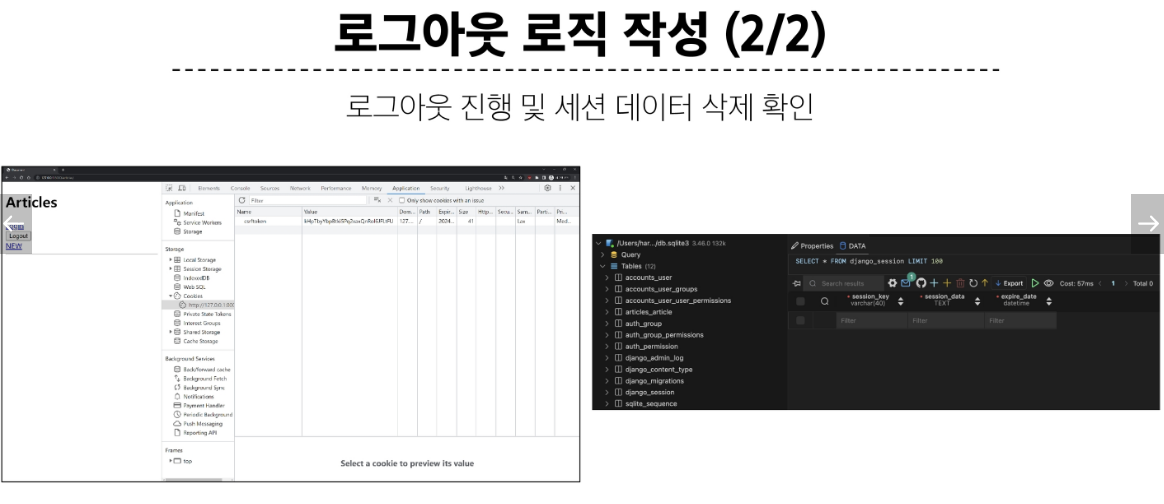

# Template with Authentication data
- 템플릿과 인증 데이터
- 템플릿에서 인증 관련 데이터를 출력하는 방법

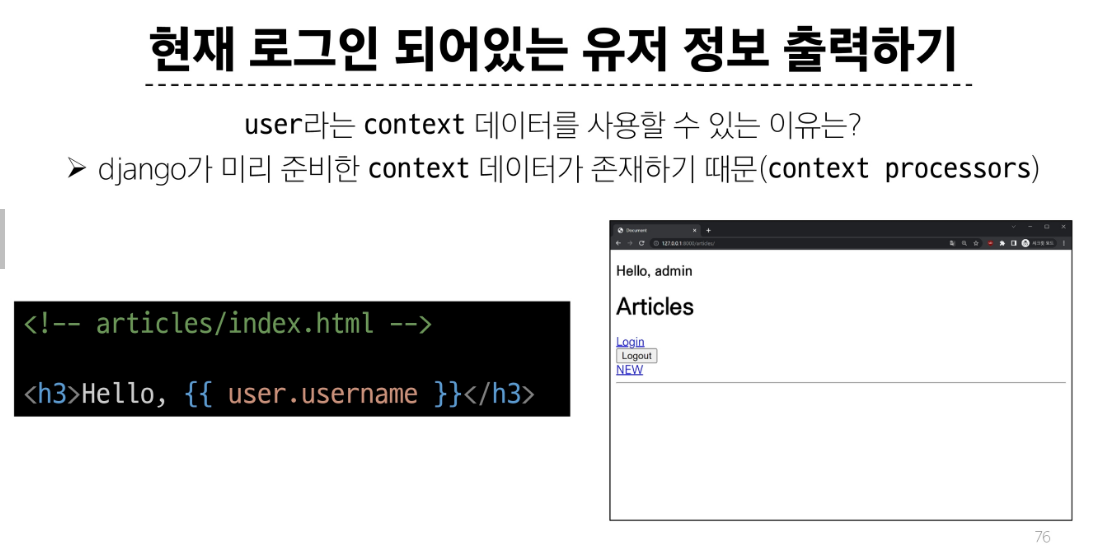
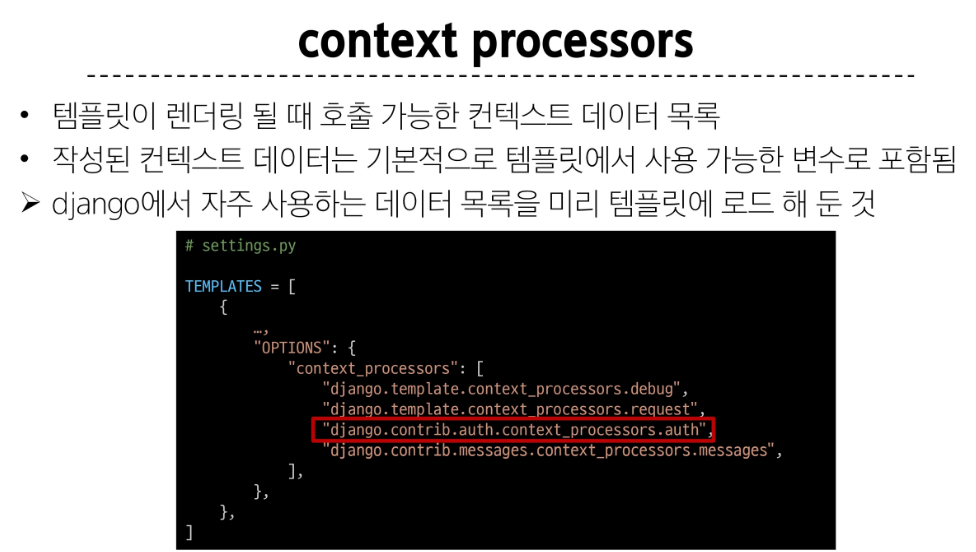

# 참고
## 쿠키의 수명
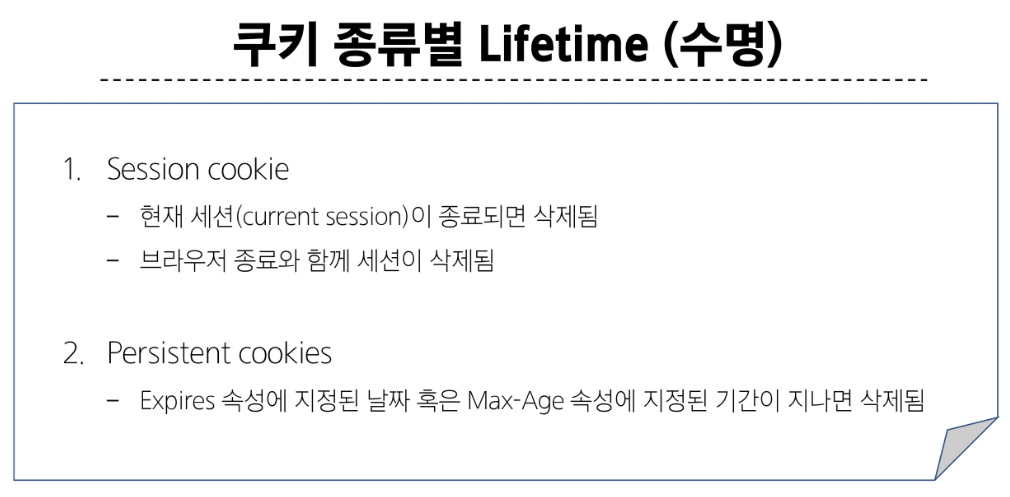

## 쿠키와 보안
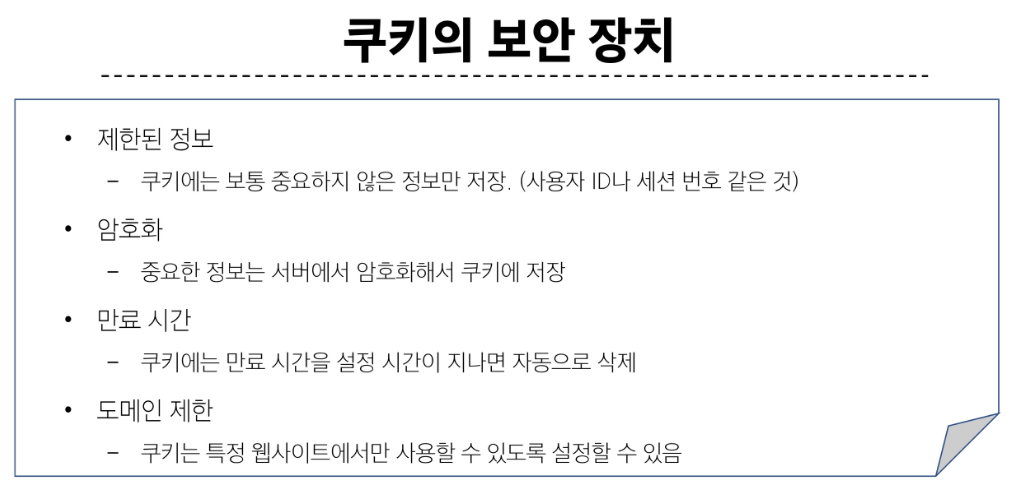

### 쿠키와 개인정보 보호
- 많은 국가에서 쿠키 사용에 대한 사용자 동의를 요구하는 법규를 시행
- 웹 사이트는 쿠키 정책을 명시하고, 필요한 경우 사용자의 동의를 얻어야 함


## Django에서의 세션 관리
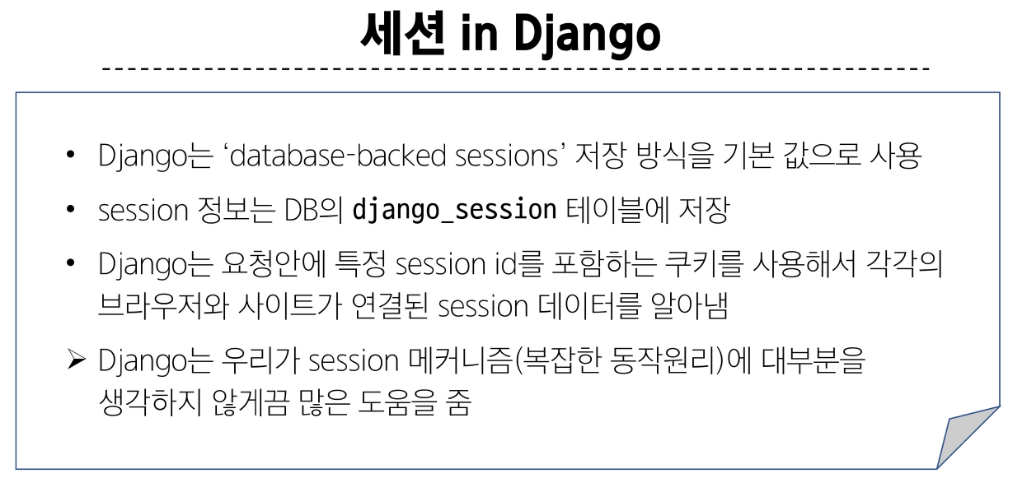

## AuthenticationForm 내부 코드
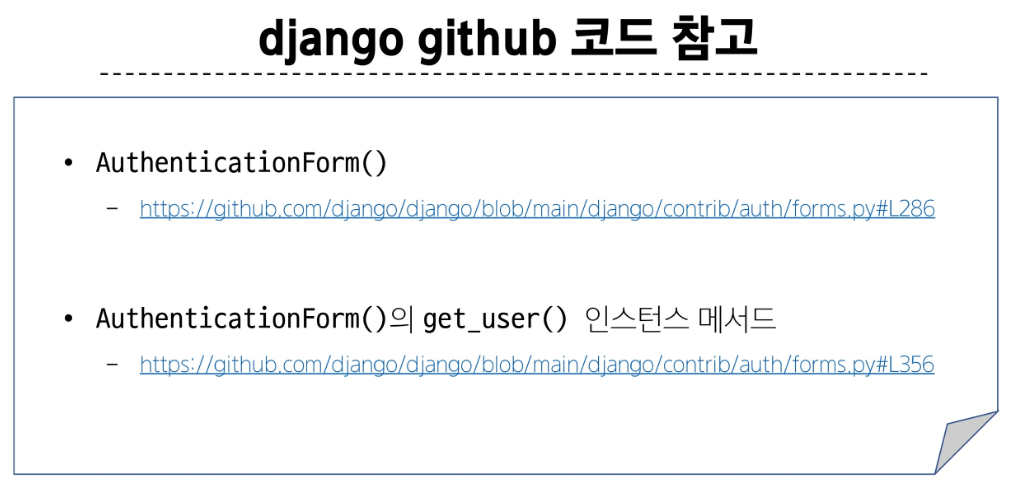

## AbstractUser class
- 관리자 권한과 함께 완전한 기능을 가지고 있는 User model을 구현하는 추상 기본 클래스

## Abstract Base Classes(추상 기본 클래스)
- 몇 가지 공통 정보를 여러 다른 모델에 넣을 때 사용하는 클래스
- 데이터베이스 테이블을 만드는데 사용되지 않으며, 대신 다른 모델의 기본 클래스로 사용되는 경우 해당 필드가 하위 클래스의 필드에 추가됨

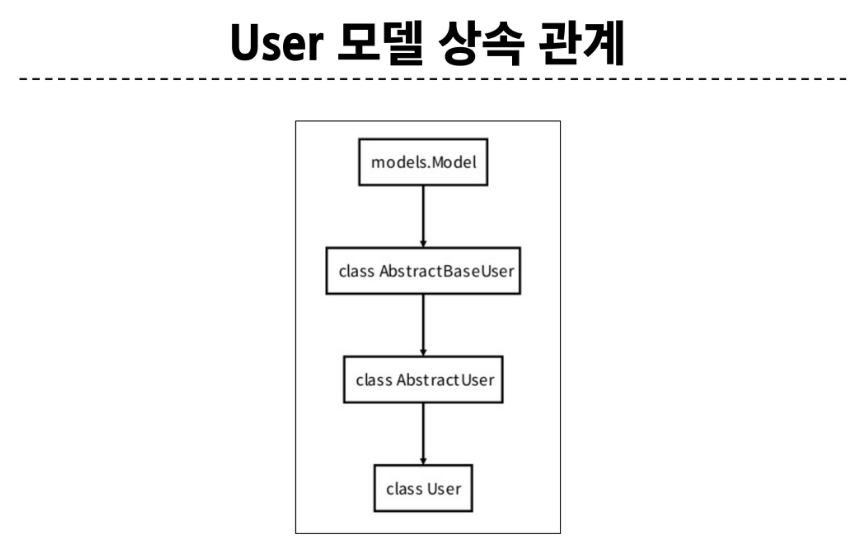

# User 모델 대체하기 Tip
- 순서를 숙지하기 어려울 경우 해당 공식 문서를 보며 순서대로 진행하는 것을 권장!